# Práctica 1 Regresión Lineal

**Dadas un par de  muestras de tamaño 150 sobre una población:**

**A) Determina la media y varianza muestral para cada una de las muestras**

**B) Determina la covarianza de la muestra y la correlación de Pearson**

**C) Atendiendo a la correlación de Pearson: ¿qué podemos afirmar sobre la relación entre las muestras?**

En el conjunto de datos Iris, que es comúnmente utilizado como ejemplo en estadísticas y aprendizaje automático, cada fila representa una flor de iris y contiene información sobre cuatro características diferentes de las flores:

**sepal_length (Longitud del sépalo)**: La longitud del sépalo, la parte externa de la flor que protege los pétalos en desarrollo. Es una de las medidas que se utilizan para describir la forma de la flor.

**sepal_width (Anchura del sépalo)**: La anchura del sépalo. Esta característica, junto con la longitud del sépalo, ayuda a describir la estructura general de la flor y puede ser un factor diferenciador entre especies de iris.

**petal_length (Longitud del pétalo)**: La longitud del pétalo, la parte coloreada y generalmente más vistosa de la flor. También es una medida importante para describir la forma de la flor.

**petal_width (Anchura del pétalo)**: La anchura del pétalo. Esta característica, junto con la longitud del pétalo, ayuda a distinguir entre las diferentes especies de iris, ya que diferentes especies tienden a tener diferentes tamaños y proporciones en los pétalos.

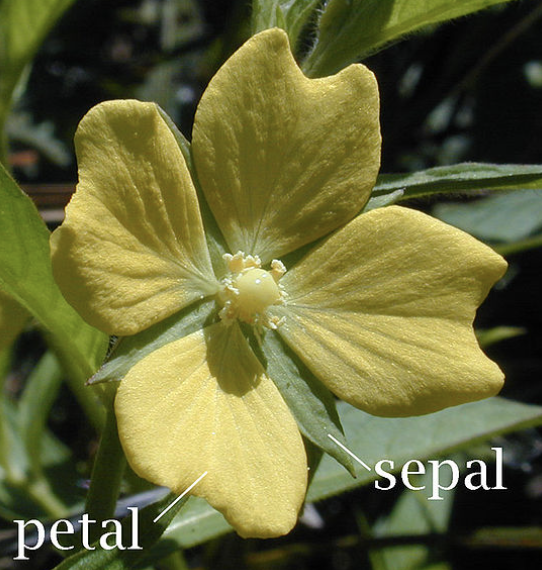

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Opciones para mostrar valores únicos

In [7]:
A = iris['sepal_length'].values
B = iris['petal_length'].values

Text(0, 0.5, 'Frecuencia')

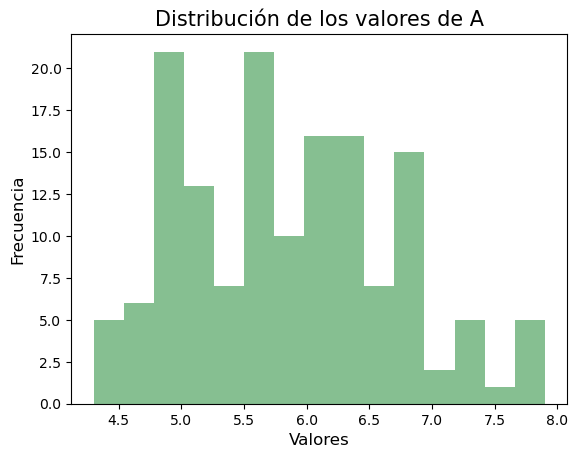

In [8]:
plt.hist(A, bins=15, color='#86bf91')
plt.title('Distribución de los valores de A', fontsize=15)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

Text(0, 0.5, 'Frecuencia')

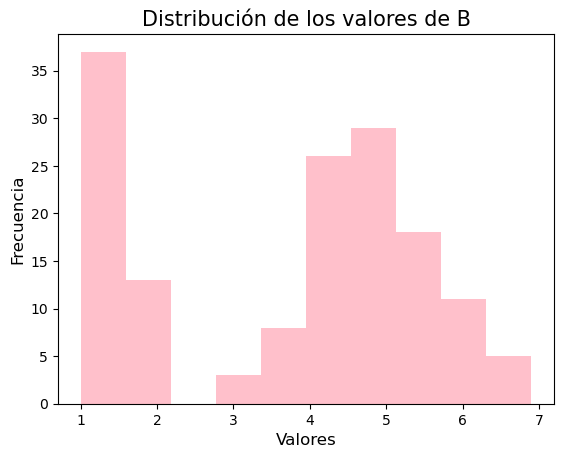

In [9]:
plt.hist(B, bins=10, color='#FFC0CB')
plt.title('Distribución de los valores de B', fontsize=15)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

Cálculo de medias y varianzas muestrales

**Medias**

In [10]:
media_A=sum(A)/len(A)

In [11]:
media_A

np.float64(5.843333333333335)

In [12]:
A.mean()

np.float64(5.843333333333334)

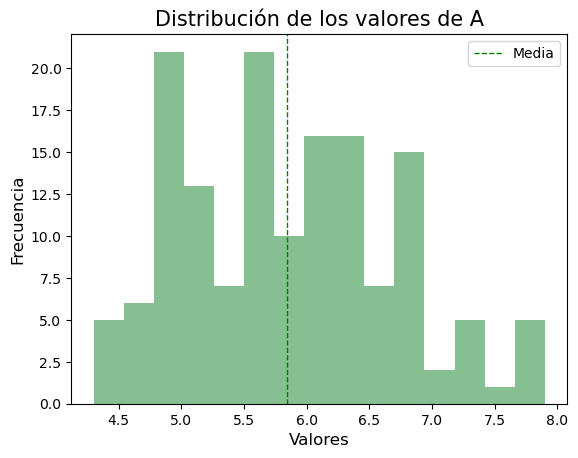

In [13]:
plt.hist(A, bins=15, color='#86bf91')
plt.title('Distribución de los valores de A', fontsize=15)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.axvline(media_A, color='g', linestyle='dashed', linewidth=1, label='Media')
plt.legend()

In [14]:
media_B=sum(B)/len(B)

In [15]:
media_B

np.float64(3.7580000000000027)

In [16]:
B.mean()

np.float64(3.7580000000000005)

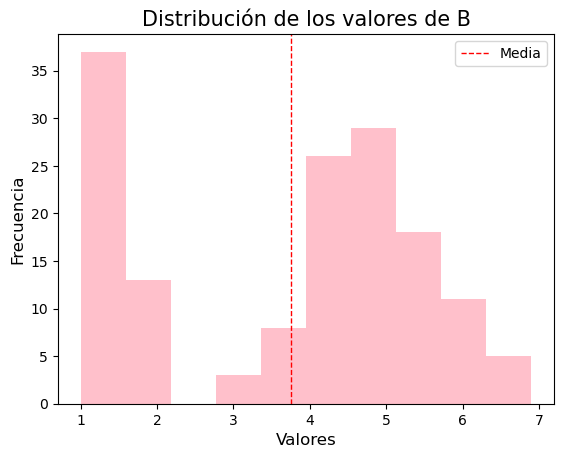

In [17]:
plt.hist(B, bins=10, color='#FFC0CB')
plt.title('Distribución de los valores de B', fontsize=15)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.axvline(media_B, color='r', linestyle='dashed', linewidth=1, label='Media')
plt.legend()

**Varianzas (Compresión de listas)**

In [18]:
# Ejemplo 1:

print("Ejemplo 1: "+str([x for x in range(1,5)]))

# Ejemplo 2:

print("Ejemplo 2: "+str([x**2 for x in range(1,5)]))

# Ejemplo 3:

print("Ejemplo 3: "+str([(x,x**2) for x in range(1,5)]))

Ejemplo 1: [1, 2, 3, 4]
Ejemplo 2: [1, 4, 9, 16]
Ejemplo 3: [(1, 1), (2, 4), (3, 9), (4, 16)]


In [19]:
var_A= sum([(x-media_A)**2/(len(A)-1) for x in A])

In [20]:
(A.std(ddof=1))**2

np.float64(0.6856935123042507)

In [21]:
var_A

np.float64(0.6856935123042509)

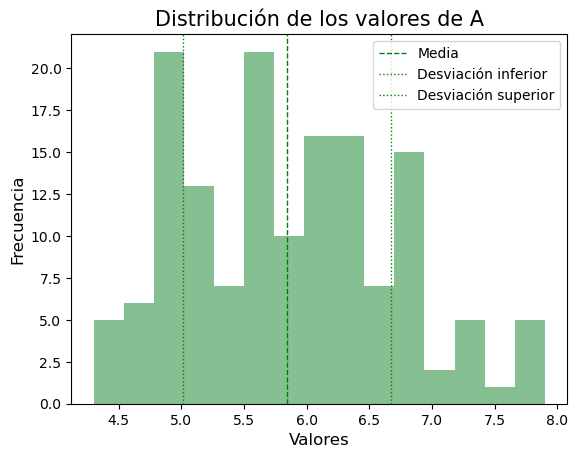

In [22]:
plt.hist(A, bins=15, color='#86bf91')
plt.title('Distribución de los valores de A', fontsize=15)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.axvline(media_A, color='g', linestyle='dashed', linewidth=1, label='Media')

plt.axvline(media_A-A.std(ddof=1), color='g', linestyle='dotted', linewidth=1, label='Desviación inferior')
plt.axvline(media_A+A.std(ddof=1), color='g', linestyle='dotted', linewidth=1, label='Desviación superior')
plt.legend()

In [23]:
var_B= sum([(x-media_B)**2/(len(B)-1) for x in B])

In [24]:
(B.std(ddof=1))**2

np.float64(3.116277852348993)

In [25]:
var_B

np.float64(3.116277852348994)

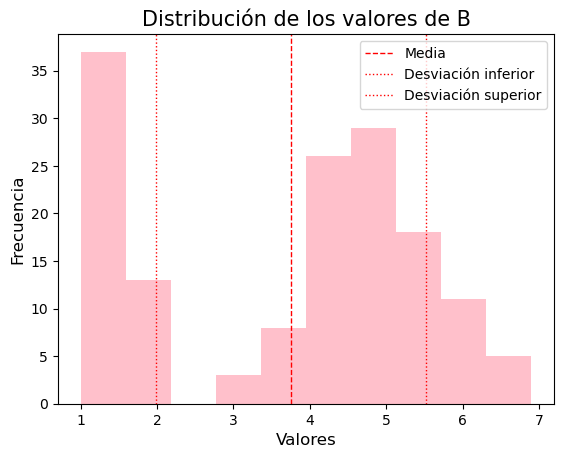

In [26]:
plt.hist(B, bins=10, color='#FFC0CB')
plt.title('Distribución de los valores de B', fontsize=15)
plt.xlabel('Valores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.axvline(media_B, color='r', linestyle='dashed', linewidth=1, label='Media')

plt.axvline(media_B-B.std(ddof=1), color='r', linestyle='dotted', linewidth=1, label='Desviación inferior')
plt.axvline(media_B+B.std(ddof=1), color='r', linestyle='dotted', linewidth=1, label='Desviación superior')
plt.legend()

**Covarianza**

In [27]:
np.cov(A,B)

array([[0.68569351, 1.27431544],
       [1.27431544, 3.11627785]])

In [28]:
sum([(x-media_A)*(y-media_B)/(len(A)-1) for (x,y) in list(zip(A,B))])

np.float64(1.274315436241611)

In [29]:
cov_AB = sum([(x-media_A)*(y-media_B)/(len(A)-1) for (x,y) in list(zip(A,B))])

**Correlación de Pearson**

In [30]:
corr_pearson = cov_AB / np.sqrt(var_A*var_B)

In [31]:
corr_pearson

np.float64(0.8717537758865831)

In [32]:
np.corrcoef(A,B)

array([[1.        , 0.87175378],
       [0.87175378, 1.        ]])